In [1]:
# Initial imports
import pandas as pd
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Needed for decision tree visualization
import pydotplus
from IPython.display import Image

## Loading and Preprocessing Crowdfunding Data

Load the `crowdfunding-data.csv` in a pandas DataFrame called `df_crowdfunding`.

In [2]:
# Load data
file_path = "https://static.bc-edx.com/mbc/ai/m4/datasets/crowdfunding-data.csv"
df_crowdfunding = pd.read_csv(file_path)
df_crowdfunding.head()

goal  pledged  backers_count  country  staff_pick  spotlight  category  \
0     100        0              0        3           0          0         0   
1    1400    14560            158        0           0          1         1   
2  108400   142523           1425        4           0          0         2   
3    4200     2477             24        0           0          0         1   
4    7600     5265             53        0           0          0         3   

   days_active  outcome  
0           17        0  
1           27        1  
2           20        1  
3           40        0  
4            4        0

Define the features set, by copying the `df_crowdfunding` DataFrame and dropping the `outcome` column.

In [3]:
# Define features set
X = df_crowdfunding.drop(columns='outcome')
X

goal  pledged  backers_count  country  staff_pick  spotlight  \
0        100        0              0        3           0          0   
1       1400    14560            158        0           0          1   
2     108400   142523           1425        4           0          0   
3       4200     2477             24        0           0          0   
4       7600     5265             53        0           0          0   
...      ...      ...            ...      ...         ...        ...   
1124   17130    15894            847        2           0          0   
1125   97329    80937            862        6           0          0   
1126   53597    40388             58        0           0          0   
1127   71588    18102            274        0           0          0   
1128   88382    28181            113        2           0          0   

      category  days_active  
0            0           17  
1            1           27  
2            2           20  
3            1           40  
4            3            4  
...        ...          ...  
1124         5            6  
1125         3           29  
1126         9           46  
1127         2           43  
1128         2           41  

[1129 rows x 8 columns]

Create the target vector by assigning the values of the `outcome` column from the `df_crowdfunding` DataFrame.

In [4]:
# Define target vector
y = df_crowdfunding['outcome']
y

0       0
1       1
2       1
3       0
4       0
       ..
1124    0
1125    0
1126    0
1127    0
1128    0
Name: outcome, Length: 1129, dtype: int64

In [5]:
y.shape

(1129,)

In [6]:
X.shape

(1129, 8)

Split the data into training and testing sets.

In [7]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

Use the `StandardScaler` to scale the features data, remember that only `X_train` and `X_testing` DataFrames should be scaled.

In [8]:
# Create the StandardScaler instance
scaler = StandardScaler()

In [9]:
# Fit the StandardScaler with the training data
X_scaler = scaler.fit(X_train)

In [10]:
# Scale the training data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Fitting the Decision Tree Model

Once data is scaled, create a decision tree instance and train it with the training data (`X_train_scaled` and `y_train`).

In [11]:
# Create the decision tree classifier instance
model = tree.DecisionTreeClassifier()

In [12]:
# Fit the model
model = model.fit(X_train_scaled, y_train)

## Making Predictions Using the Tree Model

Validate the trained model, by predicting malware apps using the testing data (`X_test_scaled`).

In [13]:
# Making predictions using the testing data
predictions = model.predict(X_test_scaled)

## Model Evaluation

Evaluate model's results, by using `sklearn` to calculate the accuracy score.

In [14]:
# Calculate the accuracy score
acc_score = accuracy_score(y_test, predictions)

print(f"Accuracy Score : {acc_score}")

Accuracy Score : 0.9752650176678446


## Visualizing the Decision Tree

In this section, you should create a visual representation of the decision tree using `pydotplus`. Show the graph on the notebook, and also save it in `PDF` and `PNG` formats.

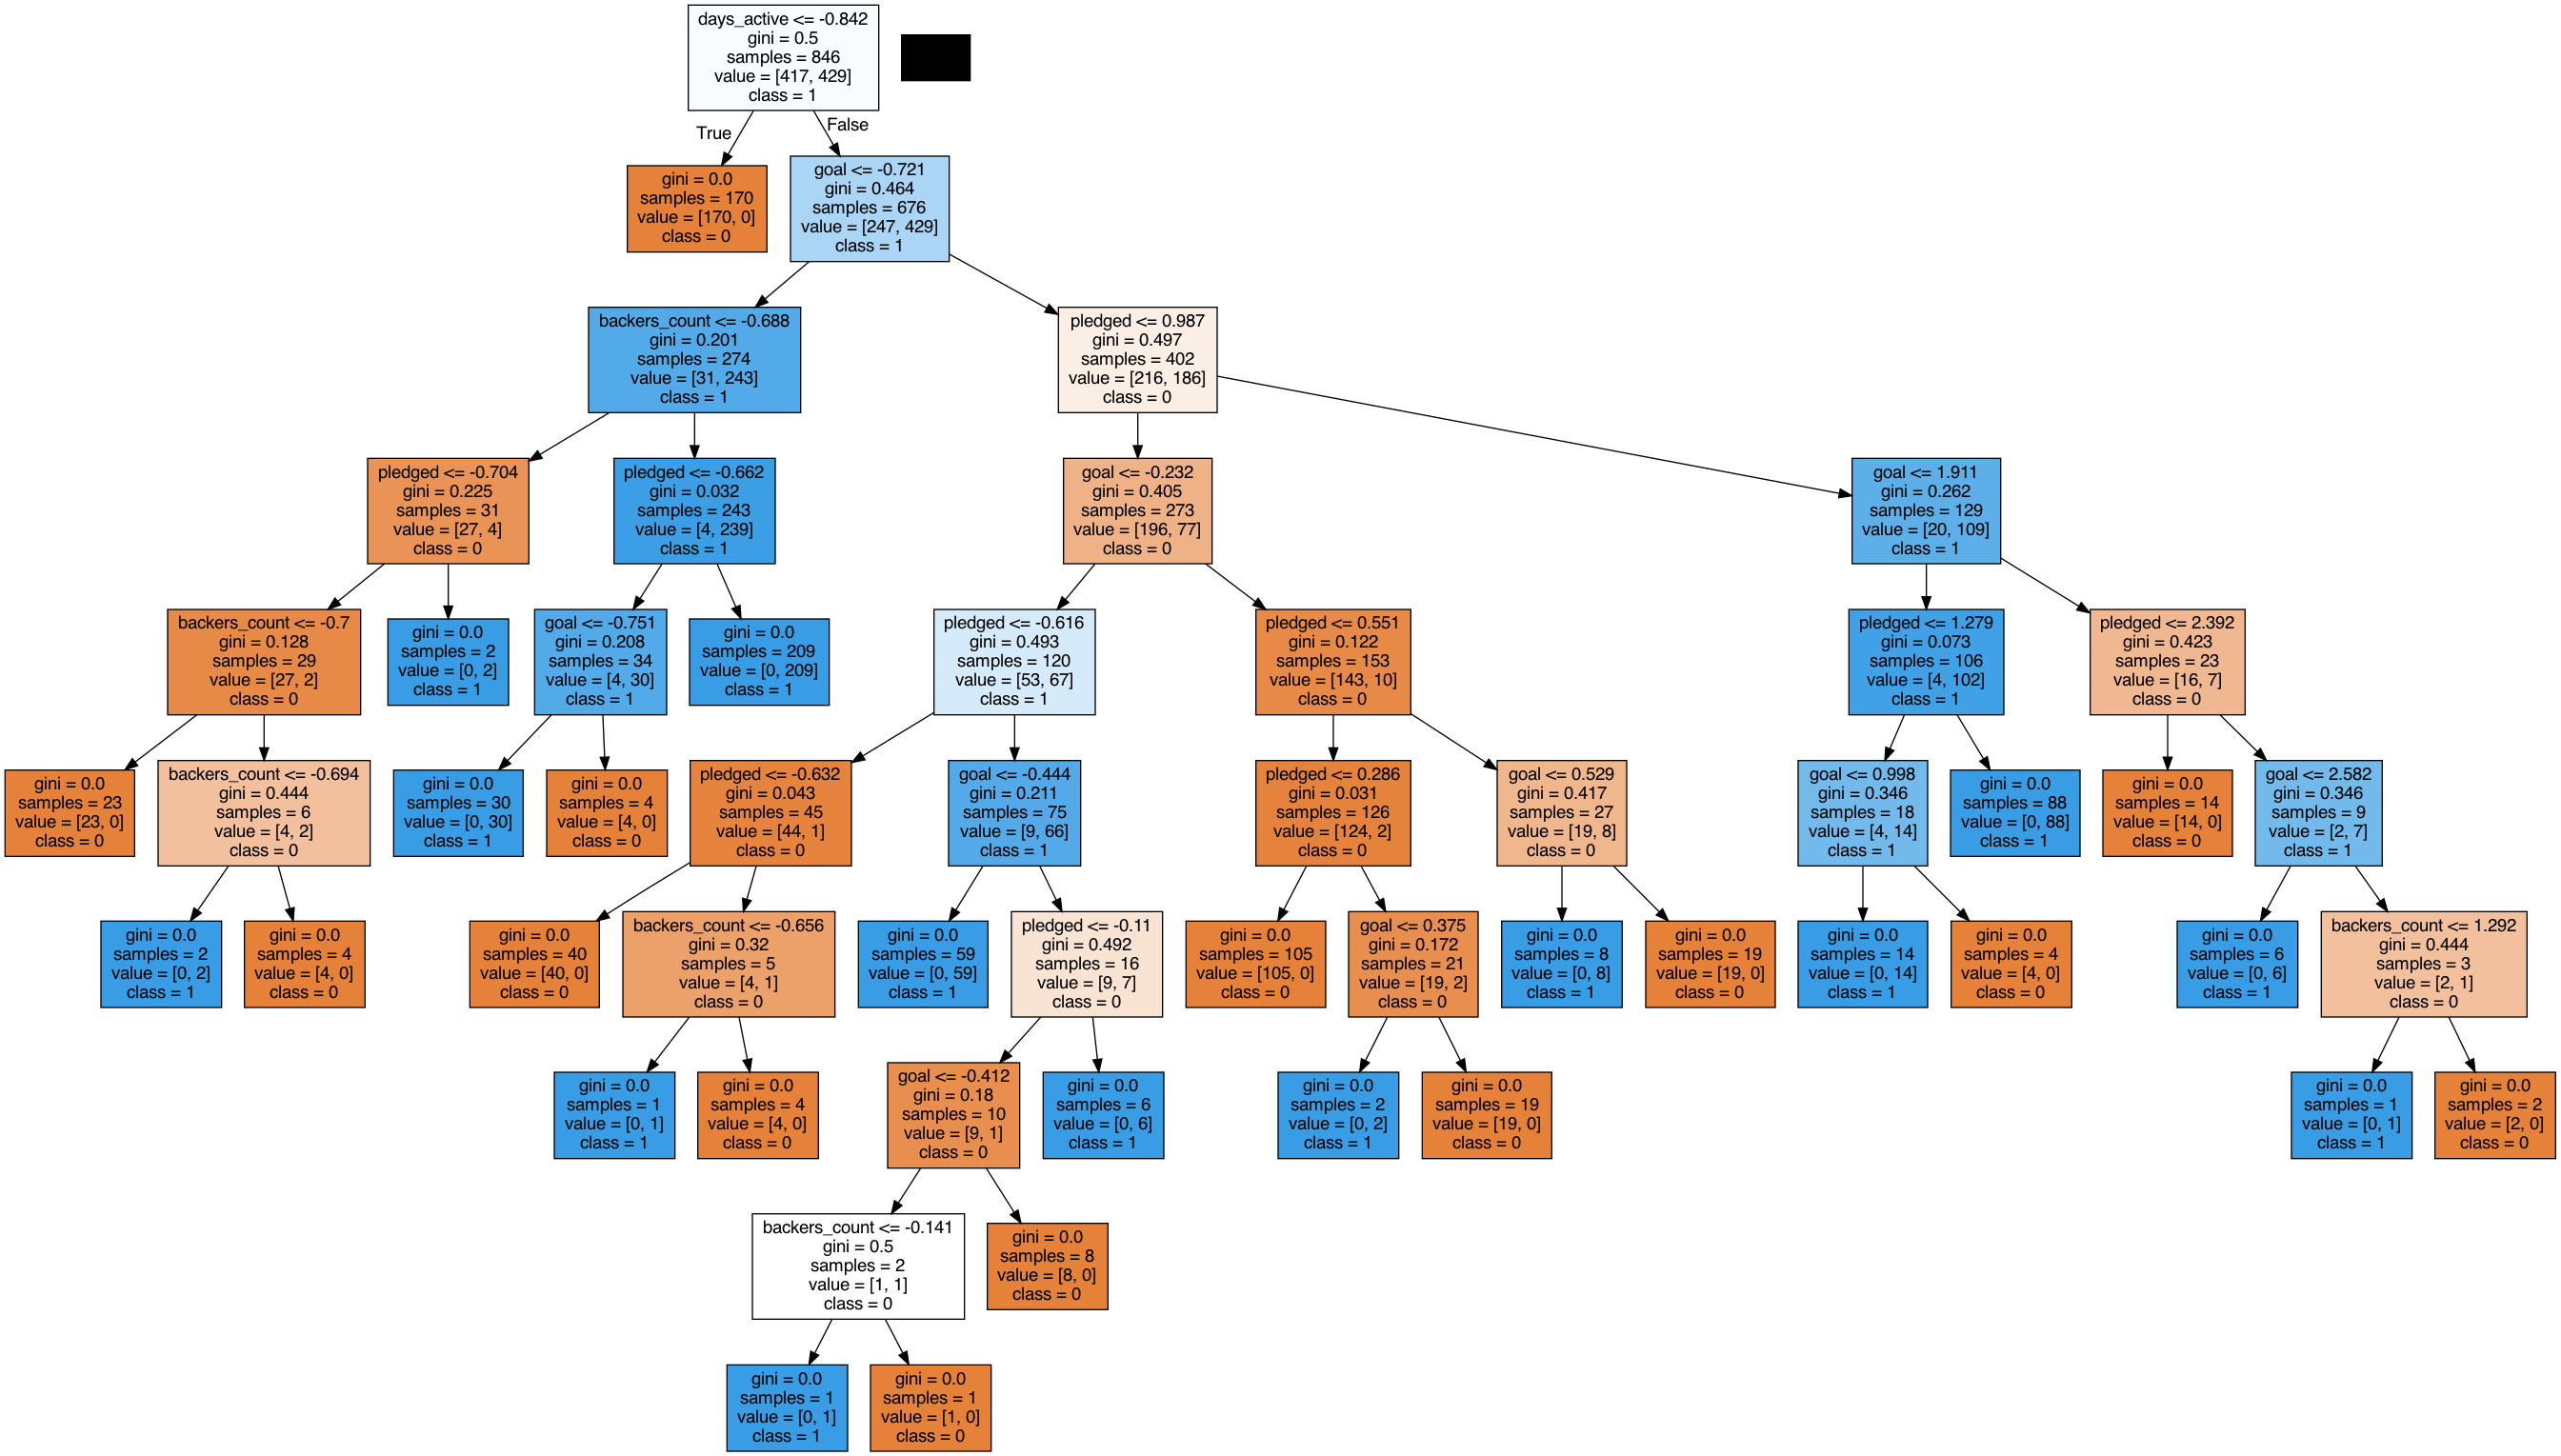

In [15]:
# Create DOT data
dot_data = tree.export_graphviz(
    model, out_file=None, feature_names=X.columns, class_names=["0", "1"], filled=True
)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())


In [16]:
# Save the tree as PDF
file_path = "crowdfunding_tree.pdf"
graph.write_pdf(file_path)

# Save the tree as PNG
file_path = "crowdfunding_tree.png"
graph.write_png(file_path)

True